In [17]:
# import libraries
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick

In [18]:
# import data, check data frames, update column names, and print column names
netflix_stocks = pd.read_csv('NFLX.csv')
#print(netflix_stocks.head())
netflix_stocks.rename(columns={'Adj Close':'Price'}, inplace=True)
print('NFLX df columns:')
print(netflix_stocks.columns,'\n')

dowjones_stocks = pd.read_csv('DJI.csv')
#print(dowjones_stocks.head())
dowjones_stocks.rename(columns={'Adj Close':'Price'}, inplace=True)
print('DJI df columns:')
print(dowjones_stocks.columns,'\n')

netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
#print(netflix_stocks_quarterly.head())
netflix_stocks_quarterly.rename(columns={'Adj Close':'Price'}, inplace=True)
print('NFLX quarterly df columns:')
print(netflix_stocks_quarterly.columns,'\n')

NFLX df columns:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Price', 'Volume'], dtype='object') 

DJI df columns:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Price', 'Volume'], dtype='object') 

NFLX quarterly df columns:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Price', 'Volume', 'Quarter'], dtype='object') 



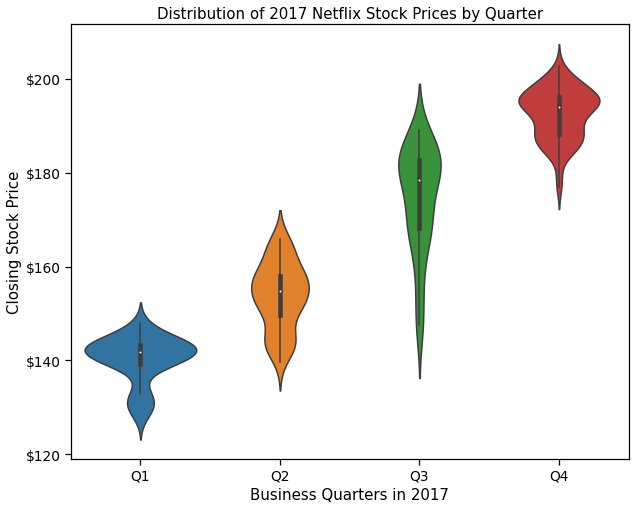

<Figure size 432x288 with 0 Axes>

In [19]:
# visualize distribution of NFLX quarterly stock prices in 2017

# create violin plot
f, ax = plt.subplots(figsize=(10,8))
sns.violinplot(data=netflix_stocks_quarterly, x='Quarter', y='Price')
# format plot
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_title('Distribution of 2017 Netflix Stock Prices by Quarter')
plt.xlabel('Business Quarters in 2017')
plt.ylabel('Closing Stock Price')
sns.set_context('notebook', font_scale=1.25)

# show and save plot
fig1=plt.gcf()
plt.show()
plt.draw()
fig1.savefig('NFLX_stock_prices_by_quarter_2017_violinplot.png')
plt.clf()

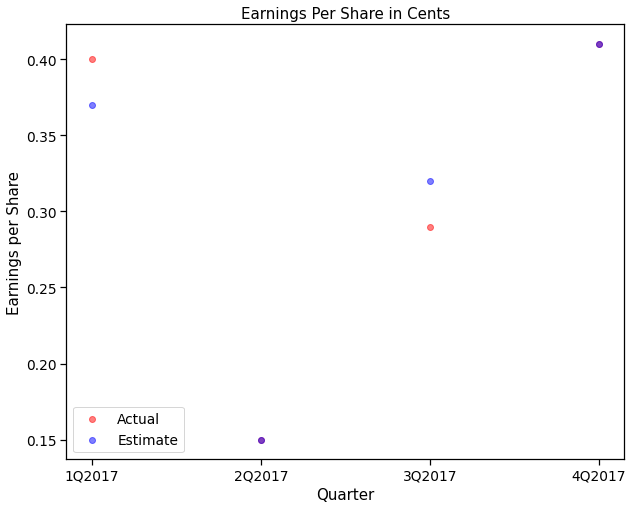

<Figure size 432x288 with 0 Axes>

In [20]:
# compare EPS values for Yahoo projected earnings compared with actual earnings for each quarter


# load summary stats for earnings actual and earnings estimated for each quarter
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

# create scatter plot
f, ax = plt.subplots(figsize=(10,8))
plt.scatter(x_positions, earnings_actual, color='red', alpha=0.5)
plt.scatter(x_positions, earnings_estimate, color='blue', alpha=0.5)
# format plot
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
plt.legend(['Actual', 'Estimate'])
plt.xticks(x_positions, chart_labels)
plt.xlabel('Quarter')
plt.ylabel('Earnings per Share')
plt.title('Earnings Per Share in Cents')

# show and save plot
fig2=plt.gcf()
plt.show()
plt.draw()
fig2.savefig('NFLX_eps_by_quarter_2017.png')
plt.clf()

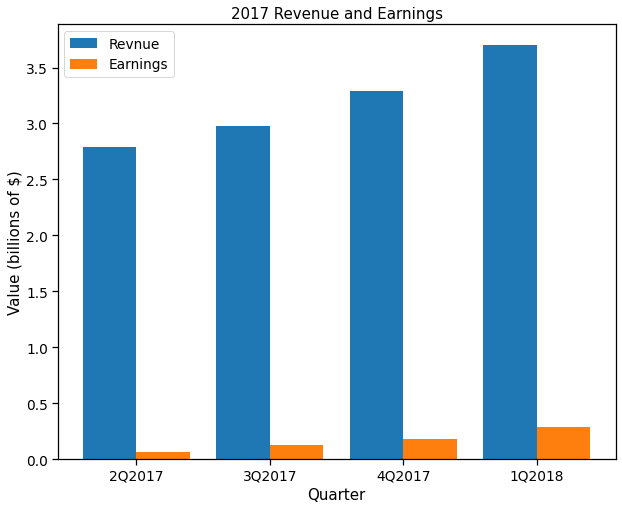

<Figure size 432x288 with 0 Axes>

In [21]:
# visualize comparison of NFLX revenue to earnings in 2017

# load summary stats for revenue and earnings per quarter
# NOTE: the metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# create bar plot
plt.figure(figsize=(10,8))

## revenue plot
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = .8 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars1_x, revenue_by_quarter)

## earnings plot
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = .8 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars2_x, earnings_by_quarter)

## middle x (this is used to set tick marks for x axis labels)
middle_x = [(a + b) / 2.0 for a,b in zip(bars1_x, bars2_x)]

# format plot
plt.xticks(middle_x, quarter_labels)
plt.ylabel('Value (billions of $)')
plt.xlabel('Quarter')
plt.title('2017 Revenue and Earnings')
plt.legend(['Revnue', 'Earnings'], loc=2)

# show and save plot
fig3=plt.gcf()
plt.show()
plt.draw()
fig3.savefig('NFLX_revenue_earnings_2017.png')

In [22]:
# determine what percent of revenue earnings entailed for each quarter
percent_of_revenue=[]
for i in range(4):
    value = earnings_by_quarter[i]/revenue_by_quarter[i] * 100
    percent_of_revenue.append(value)

print(percent_of_revenue)

[2.3512544802867383, 4.348657718120806, 5.638905775075988, 7.8410810810810805]


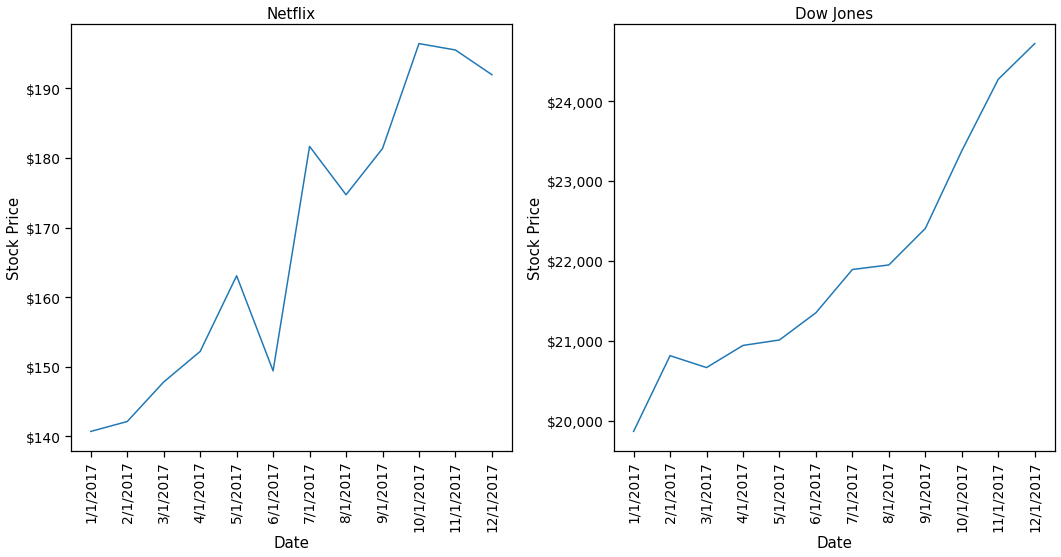

<Figure size 432x288 with 0 Axes>

In [23]:
# visualize comparison of NFLX and DJI stock prices in 2017

# create side-by-side line graphs
plt.figure(figsize=(15,8))

## create NFLX plot
ax1 = plt.subplot(1, 2, 1)
plt.plot(netflix_stocks.Date, netflix_stocks.Price)
## format NFLX plot
x1_values=range(len(netflix_stocks.Date))
ax1.set_title('Netflix')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax1.set_xticks(x1_values)
ax1.set_xticklabels(netflix_stocks.Date, rotation=90)
ax1.yaxis.set_major_formatter(tick)


## create DJI plot
ax2 = plt.subplot(1, 2 ,2)
plt.plot(dowjones_stocks.Date, dowjones_stocks.Price)
## format DJI plot
x2_values=range(len(dowjones_stocks.Date))
ax2.set_title('Dow Jones')
ax2.set_xlabel('Date')
ax2.set_ylabel('Stock Price')
ax2.set_xticks(x2_values)
ax2.set_xticklabels(dowjones_stocks.Date, rotation=90)
ax2.yaxis.set_major_formatter(tick)

# format both plots
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# show and save plot
fig4=plt.gcf()
plt.show()
plt.draw()
fig4.savefig('NFLX_v_DJI_by_quarter_2017.png')